<a href="https://colab.research.google.com/github/Cyber-30/SEM_6-Datascience/blob/main/NORMAL_DISTRIBUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NORMAL DISTRIBUTION

Nomral distribution, also knonw as Gaussian distribution, is one of the most popular continious distribution in the field of analytics espicially due to its use in multiple contexts. Normal distributions is observed across many naturally occuring measures such as age, salary,sales volume, birth weight, height, etc. It is also popularly known as bell curve (as it is shaped like a bell)

## Example of Normal Distribution


To understand normal distribution and its application, we will use daily returns of stocks traded in BSE (Bombay Stock Exchange). Imagine a scenario where an investor wants to understand the risks and returns associated with various stocks before investing in them. For this analysis, we will evaluate two stocks: BEML and GLAXO. The daily trading data (open and close price) for each stock is taken for the period starting from 2010 to 2016 from BSE site (www.bseindia.com).

First, we will load and prepare the data before getting back to the application of normal distribution.

In [29]:
import pandas as pd
import numpy as np
import warnings

beml_df = pd.read_csv('BEML.csv')
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [30]:
glaxo_df = pd.read_csv('GLAXO.csv')
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


The dataset contains daily Open and Close price along with daily high and Low prices, Total Trade Quantity and Turnover (Lacs). Our discussion will involve only close price. The daily returns of a stock are calculated as the change in close prices with respect to the close price of yesterday.

Since our analysis will involve only daily close prices, so we will select Date and Close columns from the DataFrames

In [31]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]

Visualize the daily close prices will show how stock prices have moved over time. To show the trend of close price, the rows should be ordered by the time. The DataFrames have a date colum, so we can create DatatimeIndex from this column Data. It will ensure that the rows are sorted by time in ascending order.

In [32]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

Let us display the first 5 records after the DataFrame is sorted by the time to ensure that it is done correctly

In [33]:
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


Now plot the trend of close prices of GLAXO stock using plot() method of matplotlib, which takes glaxo_df. Close as a parameter.

Text(0, 0.5, 'Close Price')

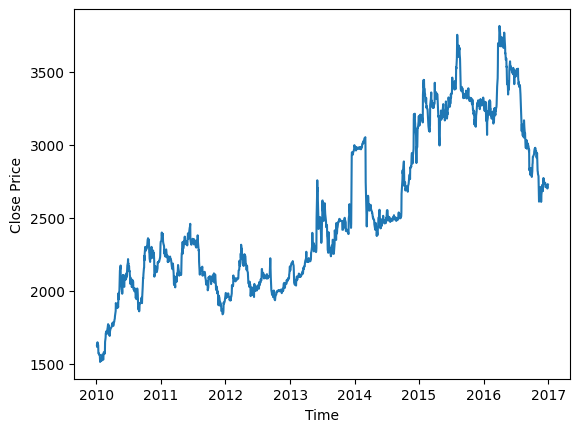

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')


Now plot BEML stock close price trend.

Text(0, 0.5, 'Close Price')

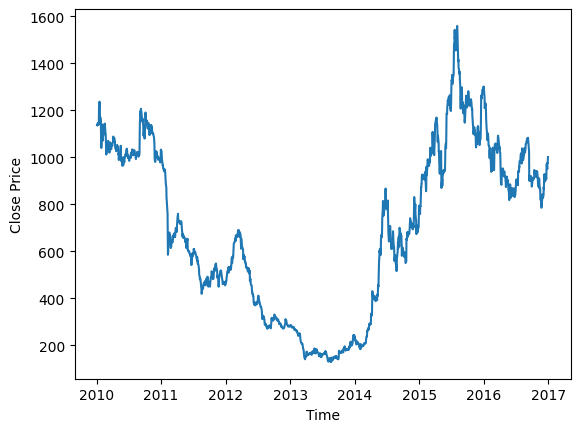

In [35]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')


It can be observed that there is an upward trend in the close price of Glaxo during 2010-2017 period. However, BEML had a downward trend during 2010-2013, followed by an upward trend since 2014 and then again a price correction from mid of 2015.

What if a short-term (intraday) investor is interested in understanding the following characteristics about these stocks:

1. What is the expected daily rate of return of these stocks?
2. Which stocks have higher risk or volatility as far as daily returns are concerned?
3. What is the expected range of return for 95% confidence interval?

4. Which stock has higher probability of making a daily return of 2% or more?
5. Which stock has higher probability of making a loss (risk) of 2% or more?


To answer the above questions, we must find out the behavior of daily returns (we will refer to this as gain hence forward) on these stocks. The gain can be calculated as a percentage change in close price, from the
previous day's close price.

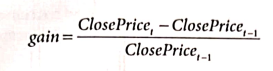

The method pct_change() in Pandas will give the percentage change in a column value shifted by a period, which is passed as a parameter to periods. periods = 1 indicates the value change since last row,
that is, the previous day.

In [36]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
glaxo_df.head(5)

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


The first day gain is shown as NAN, as there is no previous day for it to calculate gain. We candrop this record using the dropna() method.

In [37]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Now, plot gain against time.

Text(0, 0.5, 'Gain')

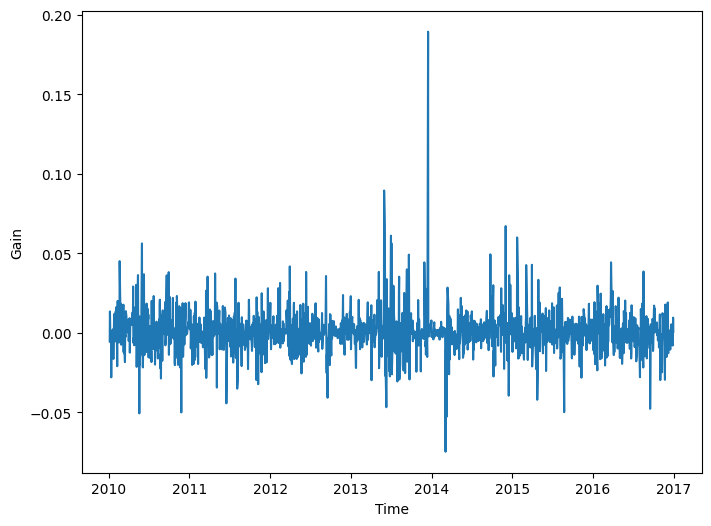

In [38]:
plt.figure(figsize = (8,6))
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')

The plot shows that the daily gain highly random and fluctuates around 0.00. The gain remains mostly between 0.05 and -0.05. howevery. However, very high gain close to 0.20 has been observed once and similarly,high loss of around 0.08 has been observed once. We can draw distribution plot of gain of both BEML and Glaxo stocks to gain better insight.

/tmp/ipython-input-2009199471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(glaxo_df.gain, label = 'Glaxo')
/tmp/ipython-input-2009199471.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(beml_df.gain, label = 'BEML')


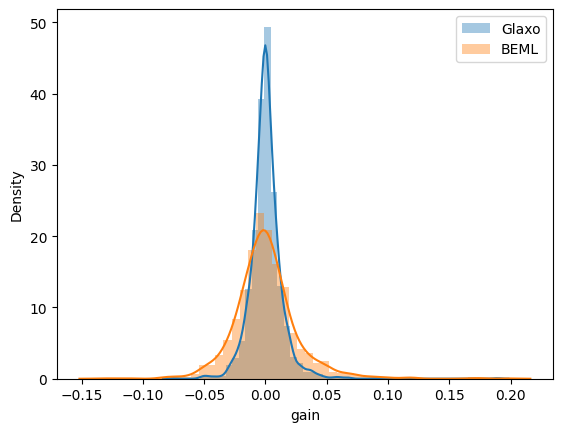

In [39]:
sn.distplot(glaxo_df.gain, label = 'Glaxo')
sn.distplot(beml_df.gain, label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

From the plot shown gain seems to be normally distributed for both the stocks with a mean around 0.00. BEML seems to have a higher variance than Glaxo

Note: The distribution has a long tail, but we will assume normal distribution for simplicity and discuss the example.

### Mean And Variance

The normal distribution is parameterized by two parameters: The mean of the distribution (mew) and the variance (small-sigma)^2. The sample mean of a normal distribution is given by

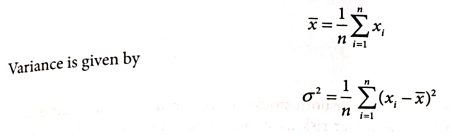

The standard deviation is square root of variance and is denoted by (sigma).

Methods mean() and std() on DataFrame columns return mean and standard deviation, respectively. Mean and standard deviation ofr returns for Glaxo are

In [40]:
print("Daily gain of Glaxo")
print("----------------------")
print("Mean: ",round(glaxo_df.gain.mean(), 4))
print("Standard Deviation: ", round(glaxo_df.gain.std(),4))

Daily gain of Glaxo
----------------------
Mean:  0.0004
Standard Deviation:  0.0134


Mean and standard deviation for daily returns for BEML are:

In [41]:
print("Daily gain of BEML")
print("----------------------")
print("Mean: ",round(beml_df.gain.mean(), 4))
print("Standard Deviation: ", round(beml_df.gain.std(),4))

Daily gain of BEML
----------------------
Mean:  0.0003
Standard Deviation:  0.0264


The describe() method of DataFrame returns the detailed statistical summary of a variables.

In [42]:
beml_df.gain.describe()

,gain
count,1738.000000
mean,0.000271
std,0.026431
min,-0.133940
25%,-0.013736
50%,-0.001541
75%,0.011985
max,0.198329


The expected daily rate of return(gain) is around 0% for both stocks. Here variance or standard derivation of gain indicates risk. So, BEML stock has a higher risk as standard devication of BEML is 2.64% whereas the standard deviation for Glaxo is 1.33%